**CVDs Prediction Model with TabNet**

This notebook implements a cardiovascular disease prediction model using TabNet classifier
with correlation analysis, SMOTE for class balancing, and comprehensive evaluation

**Import Required Libraries**

This cell imports all necessary libraries for data manipulation and visualization


In [ ]:
# Import necessary libraries
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical computations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns        # For statistical data visualization

**Load and Explore Dataset**

This cell loads the BRFSS2015 dataset and displays basic information
about its structure, data types, and initial overview

In [ ]:
dataset_path = '/content/1  heart_disease_health_indicators_BRFSS2015.csv'  # Update with your file path
data = pd.read_csv(dataset_path)  # Read CSV file into pandas DataFrame

In [ ]:
# Basic information about the dataset
print("Dataset Overview:")
print(data.info())  # Display column names, data types, and non-null counts

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-n

In [ ]:
data.head()  # Display first 5 rows of the dataset

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Separate Features and Target Variable**

This cell separates the dataset into features (X) and target variable (y)

In [ ]:
# Separate features and target
X = data.drop('HeartDiseaseorAttack', axis=1)  # Features: all columns except target
y = data['HeartDiseaseorAttack']               # Target: heart disease indicator

In [ ]:
X.head()  # Display first 5 rows of features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y.head()  # Display first 5 values of target variable

,HeartDiseaseorAttack
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


**Initial Train-Test Split**

 This cell performs an initial split of the data into training and testing sets
 using 70% for training and 30% for testing

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split  # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(
    X,                    # Features to split
    y,                    # Target to split
    test_size=0.3,        # 30% of data for testing
    random_state=0)       # Set seed for reproducibility

X_train.shape, X_test.shape  # Display shapes of training and testing sets

((177576, 21), (76104, 21))

**Calculate Feature Correlations**

 This cell computes the correlation matrix for the training features
 to identify relationships between different variables



In [ ]:
X_train.corr()  # Calculate correlation matrix for training features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.298480,0.099208,0.214009,0.098052,0.127756,0.270417,-0.125302,-0.040920,-0.060580,...,0.037836,0.016599,0.301149,0.057752,0.161902,0.223031,0.051170,0.342461,-0.142478,-0.170138
HighChol,0.298480,1.000000,0.086331,0.106704,0.090971,0.091542,0.208313,-0.080492,-0.041278,-0.040908,...,0.044162,0.013382,0.208385,0.060843,0.122333,0.144512,0.030266,0.271086,-0.068710,-0.083991
CholCheck,0.099208,0.086331,1.000000,0.033727,-0.008179,0.024985,0.067458,0.004965,0.021297,0.003914,...,0.118345,-0.056282,0.048570,-0.005856,0.033870,0.040381,-0.024175,0.090400,0.000714,0.015347
BMI,0.214009,0.106704,0.033727,1.000000,0.011633,0.020022,0.223936,-0.150076,-0.088547,-0.064334,...,-0.017756,0.058207,0.239913,0.085087,0.118389,0.196796,0.044033,-0.038103,-0.105055,-0.099011
Smoker,0.098052,0.090971,-0.008179,0.011633,1.000000,0.061233,0.060555,-0.087066,-0.076567,-0.031293,...,-0.022477,0.049374,0.162600,0.090586,0.115899,0.120661,0.093618,0.120579,-0.159170,-0.122096
Stroke,0.127756,0.091542,0.024985,0.020022,0.061233,1.000000,0.101314,-0.069841,-0.013879,-0.039815,...,0.009018,0.034326,0.176289,0.071956,0.149462,0.174749,0.004166,0.125636,-0.075813,-0.126818
Diabetes,0.270417,0.208313,0.067458,0.223936,0.060555,0.101314,1.000000,-0.123895,-0.041551,-0.059308,...,0.013726,0.038291,0.300556,0.073271,0.175931,0.222903,0.030682,0.182160,-0.129449,-0.168684
PhysActivity,-0.125302,-0.080492,0.004965,-0.150076,-0.087066,-0.069841,-0.123895,1.000000,0.141517,0.153456,...,0.035763,-0.063044,-0.265962,-0.126192,-0.219915,-0.254027,0.030752,-0.093948,0.199306,0.198724
Fruits,-0.040920,-0.041278,0.021297,-0.088547,-0.076567,-0.013879,-0.041551,0.141517,1.000000,0.254971,...,0.032409,-0.044272,-0.105306,-0.066270,-0.045060,-0.048426,-0.094751,0.064632,0.109118,0.079285
Veggies,-0.060580,-0.040908,0.003914,-0.064334,-0.031293,-0.039815,-0.059308,0.153456,0.254971,1.000000,...,0.030970,-0.033708,-0.126525,-0.058524,-0.063874,-0.079526,-0.065327,-0.009639,0.155561,0.151322


**Visualize Full Dataset Correlations**

This cell creates a heatmap to visualize correlations between all variables
in the original dataset including the target variable

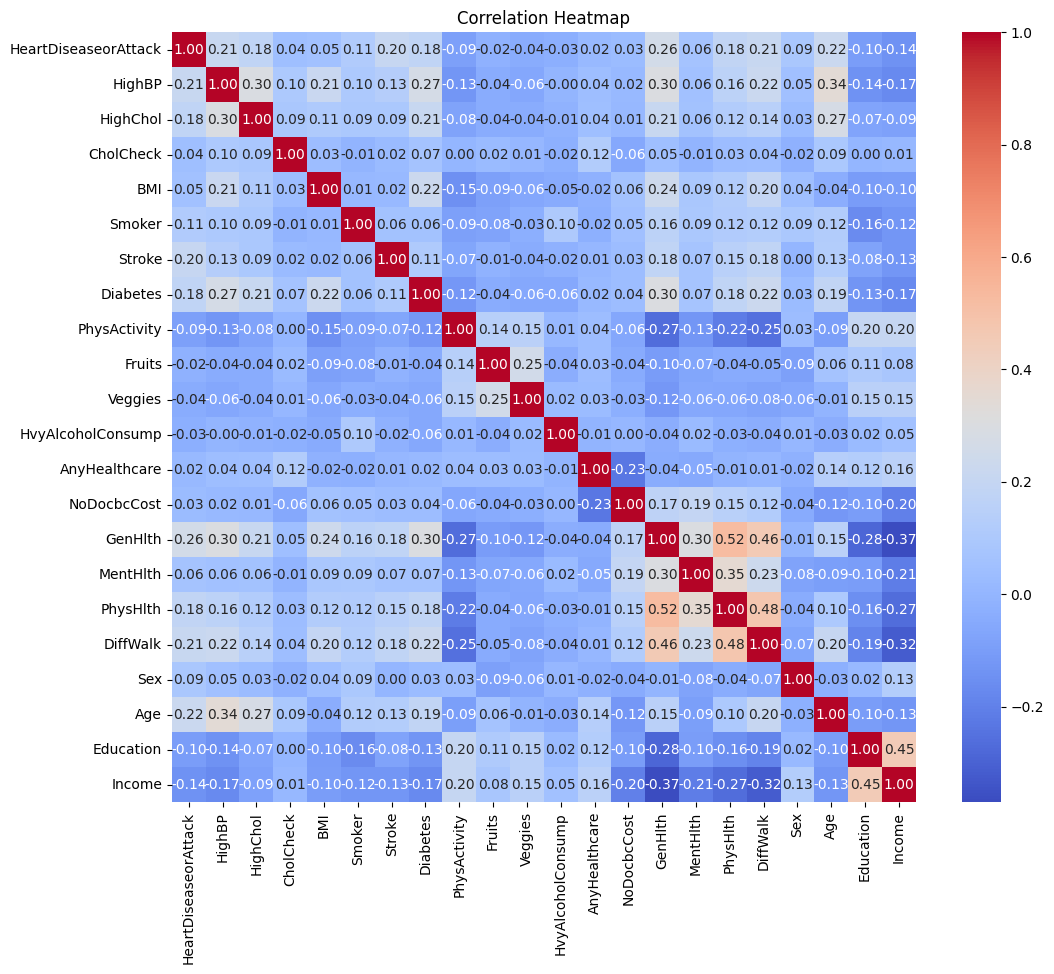

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(12, 10))  # Create figure with specified size
sns.heatmap(data.corr(),      # Create heatmap of correlation matrix
           annot=True,        # Show correlation values in cells
           fmt=".2f",         # Format numbers to 2 decimal places
           cmap="coolwarm",   # Use coolwarm color scheme
           cbar=True)         # Show color bar
plt.title("Correlation Heatmap")  # Add title to the plot
plt.show()  # Display the plot

**Visualize Training Features Correlations**

This cell creates a heatmap specifically for training features
to analyze correlations without the target variable

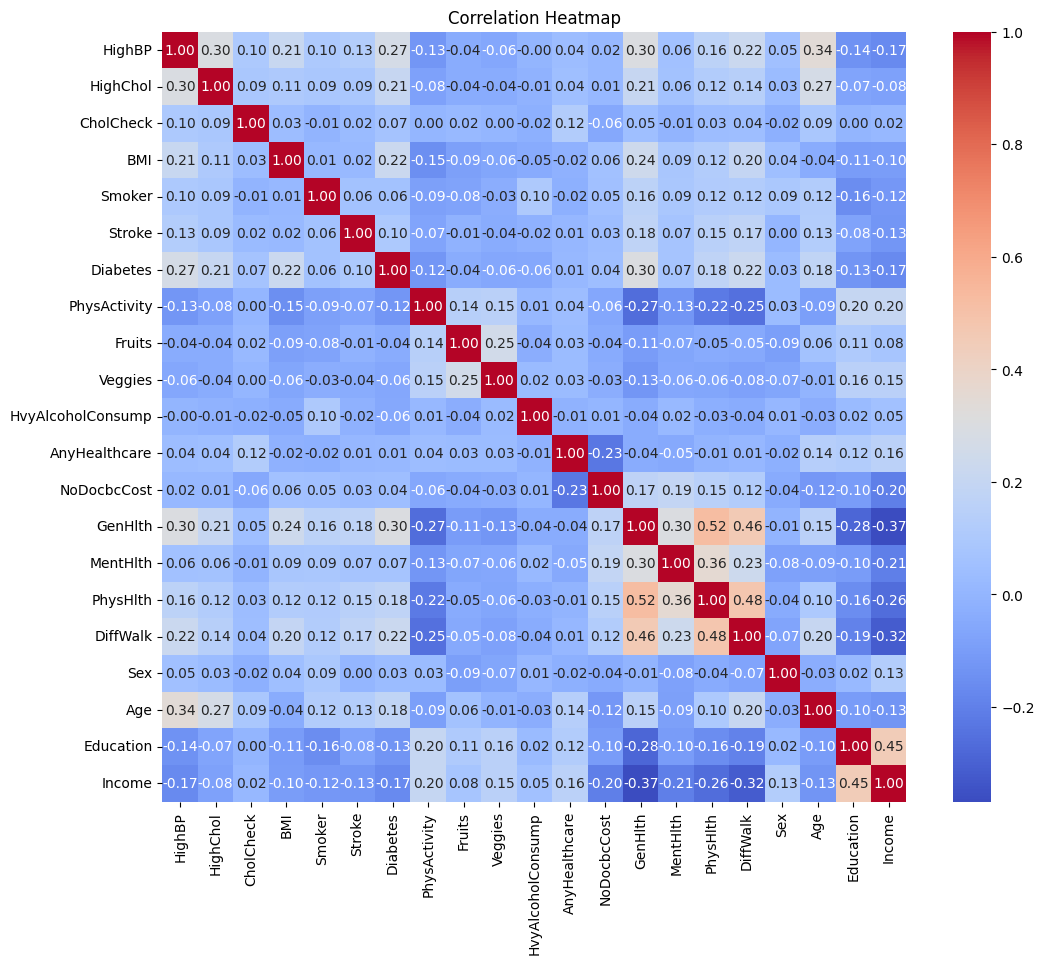

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(12, 10))  # Create figure with specified size
sns.heatmap(X_train.corr(),   # Create heatmap of training features correlation
           annot=True,        # Show correlation values in cells
           fmt=".2f",         # Format numbers to 2 decimal places
           cmap="coolwarm",   # Use coolwarm color scheme
           cbar=True)         # Show color bar
plt.title("Correlation Heatmap")  # Add title to the plot
plt.show()  # Display the plot

**Define Correlation Function**

 This cell defines a function to identify highly correlated features
that exceed a specified threshold for potential removal

with the following function we can select highly correlated features.

It will remove the first feature that is correlated with anything other feature

In [ ]:
def correlation(dataset, threshold):
    """
    Identifies features that are highly correlated with other features.
    
    Args:
        dataset: DataFrame containing features
        threshold: Correlation threshold above which features are considered correlated
    
    Returns:
        set: Names of correlated features to be removed
    """
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()  # Calculate correlation matrix
    
    # Iterate through correlation matrix
    for i in range(len(corr_matrix.columns)):      # Loop through each column
        for j in range(i):                         # Loop through previous columns only
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds threshold
                colname = corr_matrix.columns[i]   # Get the name of correlated column
                col_corr.add(colname)              # Add to set of correlated features
    return col_corr  # Return set of correlated feature names

**Identify Correlated Features**

This cell applies the correlation function to identify features with correlation above 0.4 threshold


In [ ]:
corr_features = correlation(X_train, 0.4)  # Find features correlated above 0.4
len(set(corr_features))  # Display number of correlated features found

3

In [ ]:
corr_features  # Display the names of correlated features

{'DiffWalk', 'Income', 'PhysHlth'}

**Apply SMOTE for Class Balancing**

This cell applies SMOTE (Synthetic Minority Oversampling Technique)
to balance the dataset by generating synthetic samples for the minority class


In [ ]:
# Investigate the imbalance in the target variable
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Alternative option commented out for ADASYN:
# from imblearn.over_sampling import ADASYN  # ADASYN for adaptive synthetic sampling
# from sklearn.model_selection import train_test_split

In [ ]:
# Perform SMOTE to balance the dataset
smote = SMOTE(random_state=0)      # Initialize SMOTE with fixed random state
X_sm, y_sm = smote.fit_resample(X, y)  # Apply SMOTE to balance the dataset


# Alternative ADASYN approach (commented out):
# adasyn = ADASYN(random_state=0)  # Initialize ADASYN with fixed random state
# X_adasyn, y_adasyn = adasyn.fit_resample(X, y)  # Apply ADASYN resampling

# Alternative ADASYN results (commented out):
# print("\nBalanced Target Class Distribution After ADASYN:")
# print(y_adasyn.value_counts())

# Note: SMOTE provides more equal target (50:50) distribution than ADASYN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Create Train-Validation-Test Split**

This cell splits the balanced dataset into training, validation, and test sets



In [ ]:
# Split balanced data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X_sm, y_sm,           # Use SMOTE-balanced data 
    test_size=0.3,        # 30% for temporary set (validation + test)
    random_state=0)       # Set seed for reproducibility

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp,       # Split temporary set into validation and test
    test_size=0.5,        # 50% of temp (15% of total) for test, 50% for validation
    random_state=0)       # Set seed for reproducibility

#training set using adasyn class balancing 
# X_train, X_temp, y_train, y_temp = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=0) #training tabnet model using adasyn class balancing
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
print("\nData Split Overview:")
print(f"Training Set: {X_train.shape}, {y_train.shape}")      # Display training set dimensions
print(f"Validation Set: {X_valid.shape}, {y_valid.shape}")    # Display validation set dimensions
print(f"Test Set: {X_test.shape}, {y_test.shape}")            # Display test set dimensions


Data Split Overview:
Training Set: (322395, 21), (322395,)
Validation Set: (69085, 21), (69085,)
Test Set: (69085, 21), (69085,)


**Recalculate Correlations After SMOTE**

This cell recalculates the correlation matrix for the new balanced training set

In [ ]:
X_train.corr()  # Calculate correlation matrix for balanced training features

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.357528,0.110267,0.212937,0.125130,0.150436,0.278554,-0.130081,-0.037913,-0.056059,...,0.047596,0.025696,0.339163,0.067836,0.174959,0.250151,0.065211,0.354036,-0.154957,-0.198955
HighChol,0.357528,1.000000,0.097601,0.108991,0.123394,0.105336,0.214913,-0.082170,-0.040281,-0.033592,...,0.051400,0.016792,0.244861,0.069533,0.130058,0.165248,0.064868,0.278306,-0.080594,-0.102788
CholCheck,0.110267,0.097601,1.000000,0.035529,0.005579,0.025589,0.068565,-0.002255,0.021613,0.002081,...,0.123826,-0.064767,0.062825,-0.009265,0.036915,0.048674,-0.000613,0.114156,-0.008875,0.004443
BMI,0.212937,0.108991,0.035529,1.000000,0.012377,0.022248,0.253690,-0.155484,-0.095918,-0.054731,...,-0.017047,0.065265,0.222558,0.091278,0.128119,0.221948,0.033857,-0.067604,-0.088768,-0.101278
Smoker,0.125130,0.123394,0.005579,0.012377,1.000000,0.079608,0.076387,-0.095256,-0.093530,-0.044276,...,-0.013887,0.047561,0.199051,0.095639,0.135499,0.142439,0.131015,0.119947,-0.165013,-0.134416
Stroke,0.150436,0.105336,0.025589,0.022248,0.079608,1.000000,0.131593,-0.102292,-0.020565,-0.058183,...,0.001854,0.069189,0.235995,0.121486,0.196616,0.232031,-0.010971,0.123929,-0.104685,-0.184259
Diabetes,0.278554,0.214913,0.068565,0.253690,0.076387,0.131593,1.000000,-0.137739,-0.046588,-0.056475,...,0.019422,0.040055,0.318381,0.088594,0.181611,0.255699,0.042018,0.160391,-0.133081,-0.181520
PhysActivity,-0.130081,-0.082170,-0.002255,-0.155484,-0.095256,-0.102292,-0.137739,1.000000,0.149145,0.157120,...,0.033965,-0.079513,-0.304777,-0.154758,-0.262156,-0.311413,0.065913,-0.088306,0.216770,0.230810
Fruits,-0.037913,-0.040281,0.021613,-0.095918,-0.093530,-0.020565,-0.046588,0.149145,1.000000,0.271136,...,0.033422,-0.059526,-0.107424,-0.079906,-0.055369,-0.064258,-0.082520,0.085715,0.123430,0.091571
Veggies,-0.056059,-0.033592,0.002081,-0.054731,-0.044276,-0.058183,-0.056475,0.157120,0.271136,1.000000,...,0.031297,-0.047519,-0.126731,-0.077247,-0.072578,-0.095934,-0.044868,-0.002023,0.161661,0.161326


**Visualize Correlations After SMOTE**

This cell creates a heatmap to visualize correlations in the balanced training data

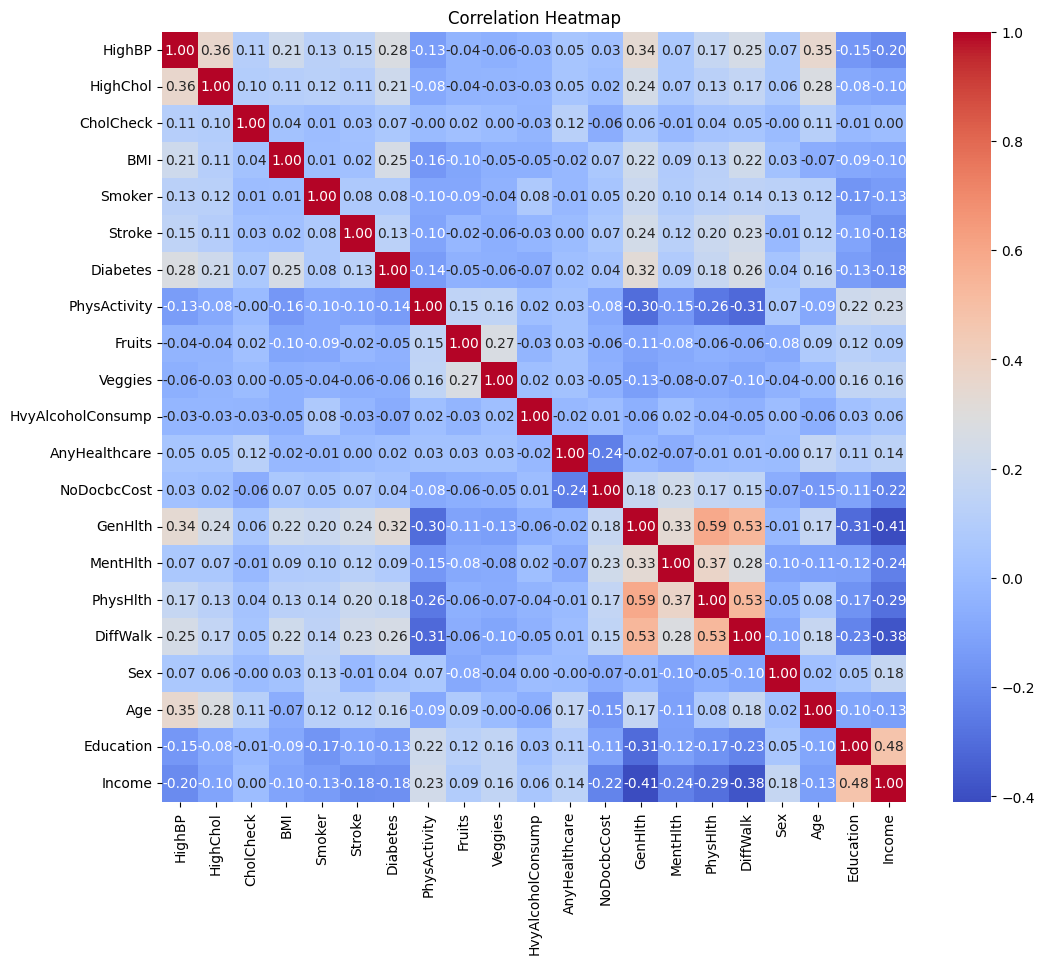

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(12, 10))  # Create figure with specified size
sns.heatmap(X_train.corr(),   # Create heatmap of balanced training features
           annot=True,        # Show correlation values in cells
           fmt=".2f",         # Format numbers to 2 decimal places
           cmap="coolwarm",   # Use coolwarm color scheme
           cbar=True)         # Show color bar
plt.title("Correlation Heatmap")  # Add title to the plot
plt.show()  # Display the plot

**Re-identify Correlated Features**

This cell re-applies the correlation function to the balanced training data


In [ ]:
corr_features = correlation(X_train, 0.4)  # Find features correlated above 0.4
len(set(corr_features))  # Display number of correlated features found

3

In [ ]:
corr_features  # Display the names of correlated features

{'DiffWalk', 'Income', 'PhysHlth'}

**Create Feature-Reduced Datasets**

This cell creates new datasets with correlated features removed and assigns them to new variables


In [ ]:
X_train1 = X_train.drop(corr_features, axis=1)  # Create training set without correlated features
X_valid1 = X_valid.drop(corr_features, axis=1)  # Create validation set without correlated features
X_test1 = X_test.drop(corr_features, axis=1)    # Create test set without correlated features

**Install TabNet Library**

This cell installs the PyTorch TabNet library for deep learning on tabular data




In [ ]:
# Install TabNet library if not already installed
!pip install pytorch-tabnet  # Install TabNet using pip

**mport TabNet and Related Libraries**

This cell imports TabNet classifier and other required libraries
for deep learning model implementation

In [ ]:
# Import necessary libraries for TabNet
from pytorch_tabnet.tab_model import TabNetClassifier  # Import TabNet classifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report  # Import evaluation metrics
import torch  # Import PyTorch for deep learning operations

**Convert Data to NumPy Arrays**

This cell converts pandas DataFrames to NumPy arrays as required by TabNet

In [ ]:
# Convert datasets to numpy arrays (TabNet requires numpy arrays)
X_train_np = X_train1.values  # Convert training features to NumPy array
y_train_np = y_train.values   # Convert training target to NumPy array
X_valid_np = X_valid1.values  # Convert validation features to NumPy array
y_valid_np = y_valid.values   # Convert validation target to NumPy array
X_test_np = X_test1.values    # Convert test features to NumPy array
y_test_np = y_test.values     # Convert test target to NumPy array

**Configure TabNet Parameters**

This cell sets up the hyperparameters and configuration for the TabNet model

In [ ]:
# TabNet parameters with optimizations
tabnet_params = {
    "cat_idxs": [],       # Provide categorical column indices (empty for all numerical)
    "cat_dims": [],       # Provide categorical dimensions (empty for all numerical)
    "cat_emb_dim": 2,     # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,  # Use Adam optimizer
    "optimizer_params": {"lr": 1e-2},  # Learning rate of 0.01
    "scheduler_params": {"step_size": 50, "gamma": 0.9},  # Learning rate scheduling parameters
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,      # Step learning rate scheduler
    # "scheduler_params": {"patience": 5, "verbose": True},  # Alternative scheduler params (commented)
    # "scheduler_fn": torch.optim.lr_scheduler.ReduceLROnPlateau,  # Alternative scheduler (commented)
    "mask_type": 'entmax'  # Use entmax for attention mechanism (alternative: "sparsemax")
}

clf = TabNetClassifier(**tabnet_params)  # Initialize TabNet classifier with parameters

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


**Train the TabNet Model**

This cell trains the TabNet model with the prepared data and hyperparameters

In [ ]:
# Train the TabNet model
clf.fit(
    X_train=X_train_np,     # Training features
    y_train=y_train_np,     # Training target
    eval_set=[(X_train_np, y_train_np), (X_valid_np, y_valid_np)],  # Evaluation sets
    eval_name=['train', 'valid'],    # Names for evaluation sets
    eval_metric=['accuracy'],        # Use accuracy as evaluation metric
    max_epochs=200,         # Maximum number of training epochs
    patience=50,            # Early stopping patience (stop if no improvement for 50 epochs)
    batch_size=4096,        # Batch size for training
    virtual_batch_size=512, # Virtual batch size for internal computation
    num_workers=0,          # Number of data loader workers
    weights=1,              # Class weights for balancing
    drop_last=False         # Don't drop last batch if smaller than batch_size
)

epoch 0  | loss: 0.52154 | train_accuracy: 0.51686 | valid_accuracy: 0.51887 |  0:00:26s
epoch 1  | loss: 0.40499 | train_accuracy: 0.50156 | valid_accuracy: 0.50257 |  0:00:43s
epoch 2  | loss: 0.35961 | train_accuracy: 0.50381 | valid_accuracy: 0.50486 |  0:00:59s
epoch 3  | loss: 0.33906 | train_accuracy: 0.52189 | valid_accuracy: 0.52205 |  0:01:16s
epoch 4  | loss: 0.32359 | train_accuracy: 0.69196 | valid_accuracy: 0.69445 |  0:01:33s
epoch 5  | loss: 0.30776 | train_accuracy: 0.78431 | valid_accuracy: 0.78451 |  0:01:50s
epoch 6  | loss: 0.29837 | train_accuracy: 0.85161 | valid_accuracy: 0.84935 |  0:02:07s
epoch 7  | loss: 0.29175 | train_accuracy: 0.84993 | valid_accuracy: 0.84998 |  0:02:25s
epoch 8  | loss: 0.29005 | train_accuracy: 0.86898 | valid_accuracy: 0.86579 |  0:02:41s
epoch 9  | loss: 0.29043 | train_accuracy: 0.85682 | valid_accuracy: 0.85422 |  0:02:58s
epoch 10 | loss: 0.28018 | train_accuracy: 0.87083 | valid_accuracy: 0.86996 |  0:03:14s
epoch 11 | loss: 0.27

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


**Initial Model Evaluation**

This cell makes predictions on the test set and calculates the AUC score

In [ ]:
# Evaluate on the test set
preds = clf.predict_proba(X_test_np)[:, 1]  # Predict probabilities for positive class (class 1)
test_auc = roc_auc_score(y_test_np, preds)  # Calculate AUC score
print(f"\nFinal Test AUC: {test_auc:.4f}")  # Display AUC score with 4 decimal places


Final Test AUC: 0.9602


**Visualize Feature Importances**

This cell extracts and visualizes the feature importances learned by TabNet

<ipython-input-88-bb5e49b04df5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X_train1.columns, palette="viridis")


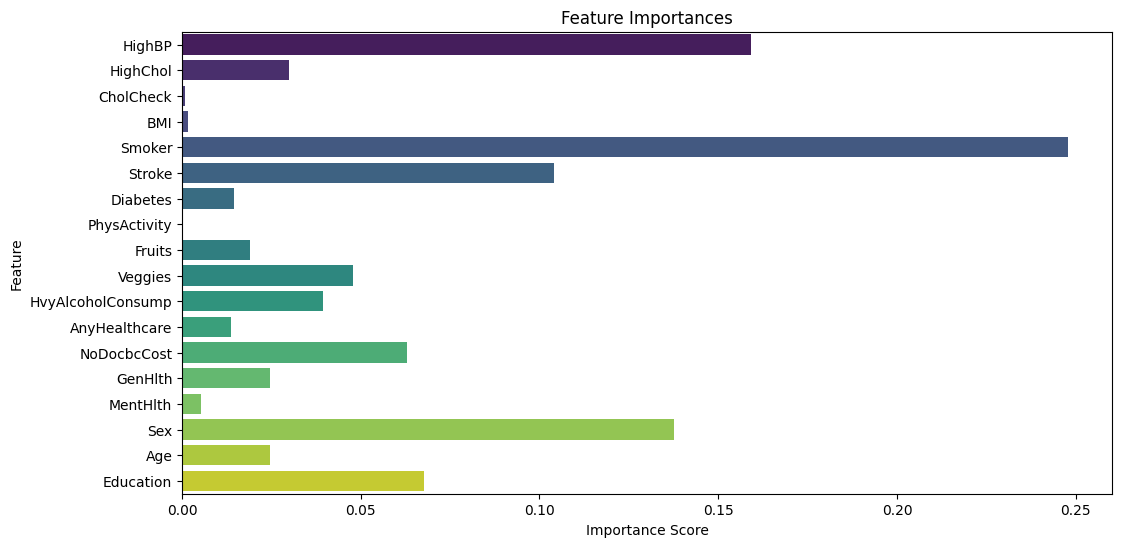

In [ ]:
# Feature importance visualization
feature_importances = clf.feature_importances_  # Get feature importances from trained model
plt.figure(figsize=(12, 6))  # Create figure with specified size
# Use X_train1.columns instead of X.columns to match the features used in the model
sns.barplot(x=feature_importances,    # Feature importance values on x-axis
           y=X_train1.columns,        # Feature names on y-axis
           palette="viridis")         # Use viridis color palette
plt.title("Feature Importances")      # Add title to the plot
plt.xlabel("Importance Score")        # Label x-axis
plt.ylabel("Feature")                 # Label y-axis
plt.show()  # Display the plot

**Visualize Top 5 Feature Importances**

This cell creates a focused visualization of the top 5 most important features

<ipython-input-89-ae92c220a51a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_features, palette="viridis")


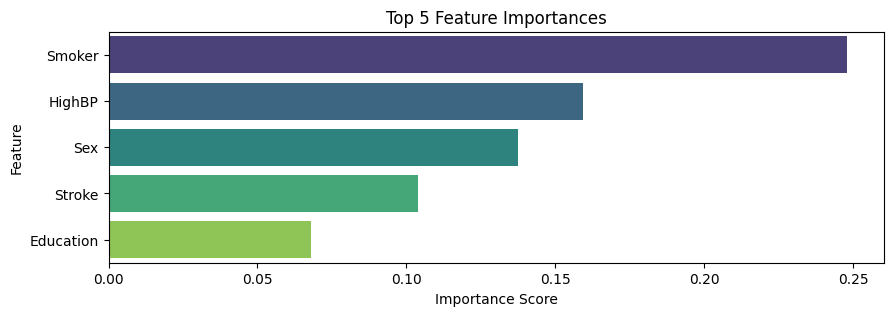

In [ ]:
# Visualize top 5 features
top_features = pd.DataFrame({
    "Feature": X_train1.columns,           # Feature names
    "Importance": feature_importances      # Corresponding importance scores
})
top_features = top_features.sort_values(
    by="Importance",    # Sort by importance score
    ascending=False     # In descending order
).head(5)              # Take top 5 features

plt.figure(figsize=(10, 3))  # Create figure with specified size
sns.barplot(x="Importance",     # Importance scores on x-axis
           y="Feature",         # Feature names on y-axis
           data=top_features,   # Use top_features DataFrame
           palette="viridis")   # Use viridis color palette
plt.title("Top 5 Feature Importances")  # Add title to the plot
plt.xlabel("Importance Score")          # Label x-axis
plt.ylabel("Feature")                   # Label y-axis
plt.show()  # Display the plot

**Comprehensive Model Evaluation**

This cell performs comprehensive evaluation including accuracy, AUC, and classification report


Test Set Evaluation:
Accuracy: 0.9004
AUC: 0.9602

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     34515
         1.0       0.94      0.86      0.90     34570

    accuracy                           0.90     69085
   macro avg       0.90      0.90      0.90     69085
weighted avg       0.90      0.90      0.90     69085



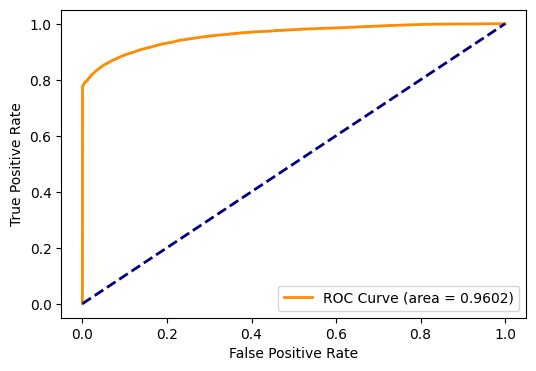

In [ ]:
# Evaluate on the test set
preds = clf.predict_proba(X_test_np)[:, 1]  # Probability for the positive class
pred_labels = clf.predict(X_test_np)        # Predicted class labels

# Calculate metrics
test_accuracy = accuracy_score(y_test_np, pred_labels)  # Calculate accuracy
test_auc = roc_auc_score(y_test_np, preds)             # Calculate AUC

print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")      # Display accuracy with 4 decimal places
print(f"AUC: {test_auc:.4f}")                # Display AUC with 4 decimal places
print("\nClassification Report:")
print(classification_report(y_test_np, pred_labels))  # Display detailed classification report


# Plot ROC Curve
# This creates and displays the Receiver Operating Characteristic (ROC) curve

# Plotting the ROC curve
from sklearn.metrics import roc_curve, auc    # Import ROC curve functions
fpr, tpr, _ = roc_curve(y_test_np, preds)     # Calculate false positive rate and true positive rate
roc_auc = auc(fpr, tpr)                       # Calculate area under ROC curve

plt.figure(figsize=(6, 4))  # Create figure with specified size
plt.plot(fpr, tpr,          # Plot ROC curve
         color='darkorange', 
         lw=2, 
         label=f'ROC Curve (area = {roc_auc:.4f})')  # Add label with AUC value
plt.plot([0, 1], [0, 1],    # Plot diagonal line (random classifier)
         color='navy', 
         lw=2, 
         linestyle='--')
# plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title commented out
plt.xlabel('False Positive Rate')  # Label x-axis
plt.ylabel('True Positive Rate')   # Label y-axis
plt.legend(loc="lower right")      # Add legend
plt.show()  # Display the plot


**Classification Reports for All Sets**

This cell generates classification reports for training, validation, and test sets



In [ ]:
# Classification report for validation and test sets
y_train_pred = clf.predict(X_train_np)  # Predictions on training set
y_valid_pred = clf.predict(X_valid_np)  # Predictions on validation set
y_test_pred = clf.predict(X_test_np)    # Predictions on test set

print("\nClassification Report on Training Set:")
print(classification_report(y_train_np, y_train_pred))  # Training set classification report

print("\nClassification Report on Validation Set:")
print(classification_report(y_valid_np, y_valid_pred))  # Validation set classification report

print("\nClassification Report on Test Set:")
print(classification_report(y_test_np, y_test_pred))    # Test set classification report



Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91    160878
         1.0       0.94      0.86      0.90    161517

    accuracy                           0.90    322395
   macro avg       0.90      0.90      0.90    322395
weighted avg       0.90      0.90      0.90    322395


Classification Report on Validation Set:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     34394
         1.0       0.94      0.85      0.89     34691

    accuracy                           0.90     69085
   macro avg       0.90      0.90      0.90     69085
weighted avg       0.90      0.90      0.90     69085


Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90     34515
         1.0       0.94      0.86      0.90     34570

    accuracy                           0.90     69085
   macro a

**Calculate Detailed Metrics for All Sets**

This cell calculates accuracy, precision, recall, and F1-score for all data splits


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Training Set Metrics
train_accuracy = accuracy_score(y_train_np, y_train_pred)    # Training accuracy
train_precision = precision_score(y_train_np, y_train_pred) # Training precision
train_recall = recall_score(y_train_np, y_train_pred)       # Training recall
train_f1 = f1_score(y_train_np, y_train_pred)              # Training F1-score

# Print metrics
print(f"\nTraining Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")    # Display training accuracy
print(f"Precision: {train_precision:.4f}")  # Display training precision
print(f"Recall: {train_recall:.4f}")        # Display training recall
print(f"F1-Score: {train_f1:.4f}")          # Display training F1-score


Training Set Metrics:
Accuracy: 0.9010
Precision: 0.9411
Recall: 0.8559
F1-Score: 0.8965


In [ ]:
# Validation Set Metrics
valid_accuracy = accuracy_score(y_valid_np, y_valid_pred)    # Validation accuracy
valid_precision = precision_score(y_valid_np, y_valid_pred) # Validation precision
valid_recall = recall_score(y_valid_np, y_valid_pred)       # Validation recall
valid_f1 = f1_score(y_valid_np, y_valid_pred)              # Validation F1-score

# Print metrics
print(f"\nValidation Set Metrics:")
print(f"Accuracy: {valid_accuracy:.4f}")    # Display validation accuracy
print(f"Precision: {valid_precision:.4f}")  # Display validation precision
print(f"Recall: {valid_recall:.4f}")        # Display validation recall
print(f"F1-Score: {valid_f1:.4f}")          # Display validation F1-score


Validation Set Metrics:
Accuracy: 0.8973
Precision: 0.9392
Recall: 0.8505
F1-Score: 0.8927


In [ ]:

# Test Set Metrics
test_accuracy = accuracy_score(y_test_np, y_test_pred)    # Test accuracy
test_precision = precision_score(y_test_np, y_test_pred) # Test precision
test_recall = recall_score(y_test_np, y_test_pred)       # Test recall
test_f1 = f1_score(y_test_np, y_test_pred)              # Test F1-score

# Print metrics
print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")     # Display test accuracy
print(f"Precision: {test_precision:.4f}")   # Display test precision
print(f"Recall: {test_recall:.4f}")         # Display test recall
print(f"F1-Score: {test_f1:.4f}")           # Display test F1-score


Test Set Metrics:
Accuracy: 0.9004
Precision: 0.9400
Recall: 0.8555
F1-Score: 0.8958


**Create Confusion Matrix Visualizations**

This cell creates confusion matrix heatmaps for validation, and test sets


In [96]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

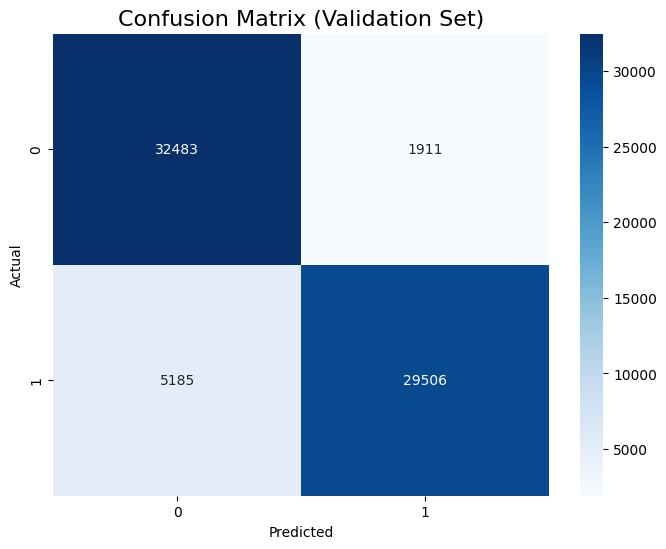

In [ ]:
# Confusion Matrices
# Validation Set
plt.figure(figsize=(8, 6))  # Create figure with specified size
sns.heatmap(confusion_matrix(y_valid_np, y_valid_pred),  # Create confusion matrix heatmap
           annot=True,        # Show values in cells
           fmt="d",           # Format as integers
           cmap="Blues")      # Use Blues color scheme
plt.title("Confusion Matrix (Validation Set)", fontsize=16)  # Add title
plt.xlabel("Predicted")     # Label x-axis
plt.ylabel("Actual")        # Label y-axis
plt.show()  # Display the plot

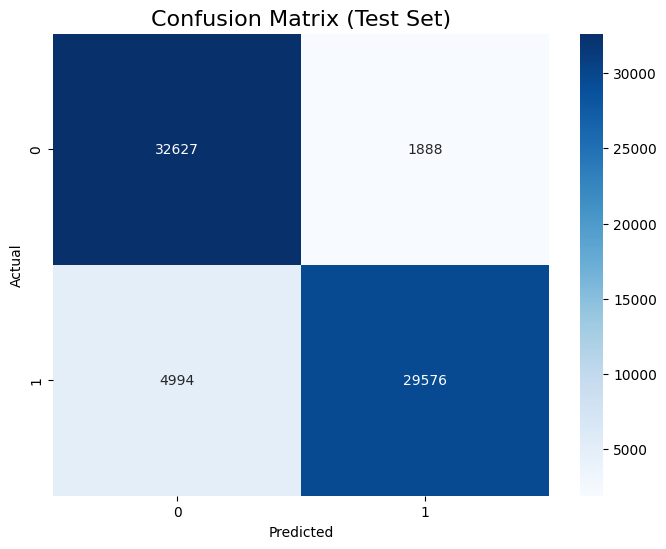

In [ ]:
# Test Set
plt.figure(figsize=(8, 6))  # Create figure with specified size
sns.heatmap(confusion_matrix(y_test_np, y_test_pred),    # Create confusion matrix heatmap
           annot=True,        # Show values in cells
           fmt="d",           # Format as integers
           cmap="Blues")      # Use Blues color scheme
plt.title("Confusion Matrix (Test Set)", fontsize=16)   # Add title
plt.xlabel("Predicted")     # Label x-axis
plt.ylabel("Actual")        # Label y-axis
plt.show()  # Display the plot

**Compare Validation vs Test Metrics**

This cell creates a bar chart comparing metrics between validation and test sets

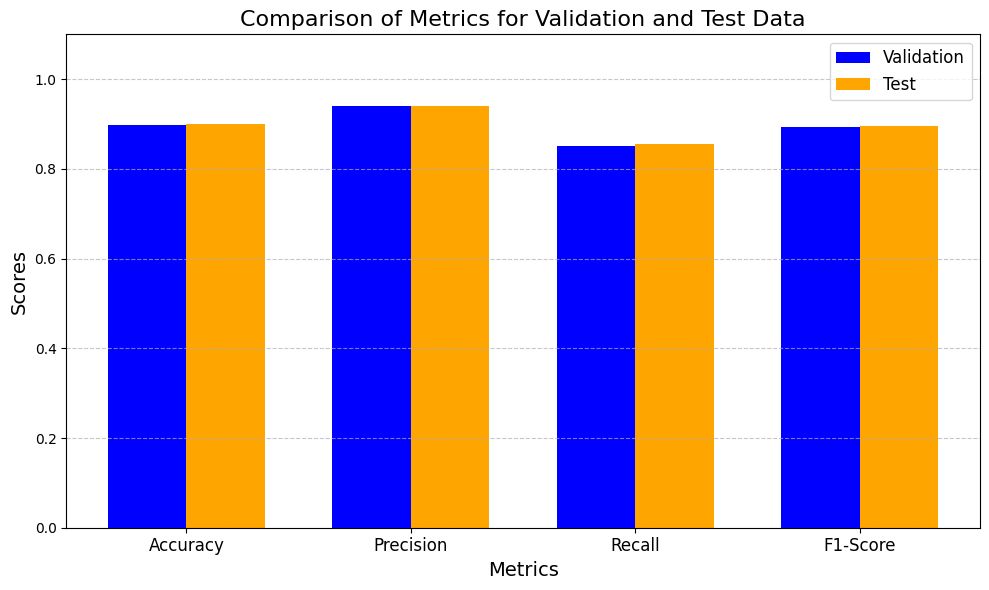

In [ ]:
# Plotting comparison graph for validation and test metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']      # List of metrics to compare
validation_scores = [valid_accuracy, valid_precision, valid_recall, valid_f1]  # Validation scores
test_scores = [test_accuracy, test_precision, test_recall, test_f1]            # Test scores

x = np.arange(len(metrics))  # The label locations
width = 0.35                 # The width of the bars

plt.figure(figsize=(10, 6))  # Create figure with specified size
plt.bar(x - width/2, validation_scores, width, label='Validation', color='blue')  # Validation bars
plt.bar(x + width/2, test_scores, width, label='Test', color='orange')           # Test bars

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=14)      # Label x-axis
plt.ylabel('Scores', fontsize=14)       # Label y-axis
plt.title('Comparison of Metrics for Validation and Test Data', fontsize=16)  # Add title
plt.xticks(ticks=x, labels=metrics, fontsize=12)  # Set x-axis tick labels
plt.ylim(0, 1.1)            # Set y-axis limit
plt.legend(fontsize=12)     # Add legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

**Compare All Three Sets Metrics**

This cell creates a comprehensive bar chart comparing metrics across training, validation, and test sets

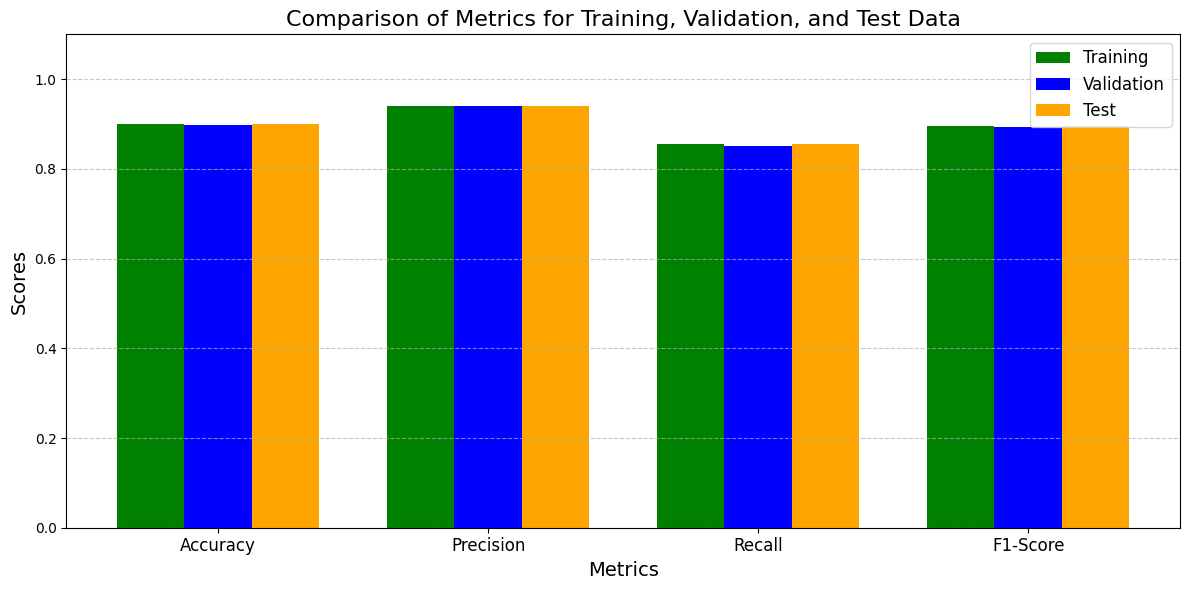

In [ ]:
# Plotting comparison graph for metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']  # List of metrics to compare
train_scores = [train_accuracy, train_precision, train_recall, train_f1]          # Training scores
validation_scores = [valid_accuracy, valid_precision, valid_recall, valid_f1]     # Validation scores
test_scores = [test_accuracy, test_precision, test_recall, test_f1]               # Test scores

x = np.arange(len(metrics))  # The label locations
width = 0.25                 # The width of the bars

plt.figure(figsize=(12, 6))  # Create figure with specified size
plt.bar(x - width, train_scores, width, label='Training', color='green')      # Training bars
plt.bar(x, validation_scores, width, label='Validation', color='blue')       # Validation bars
plt.bar(x + width, test_scores, width, label='Test', color='orange')         # Test bars

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=14)      # Label x-axis
plt.ylabel('Scores', fontsize=14)       # Label y-axis
plt.title('Comparison of Metrics for Training, Validation, and Test Data', fontsize=16)  # Add title
plt.xticks(ticks=x, labels=metrics, fontsize=12)  # Set x-axis tick labels
plt.ylim(0, 1.1)            # Set y-axis limit
plt.legend(fontsize=12)     # Add legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot